In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [6]:
df = pd.read_csv('Car-details-v3.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [9]:
df_car.head

<bound method NDFrame.head of                               name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission    

In [10]:
df_car.shape

(8128, 13)

In [11]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [12]:
duplicate = df_car[df_car.duplicated()]
print("Duplicated Rows:")
duplicate

Duplicated Rows:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
291,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
296,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
370,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
371,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
372,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
7988,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
8117,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [17]:
df_car.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [132]:
df_car.shape

(7906, 11)

In [134]:
# no of dropped rows
df_car.isnull().sum()

year            0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
mileage         0
engine          0
max_power       0
torque          0
seats           0
dtype: int64

In [138]:
# duplicate data
df_car.duplicated().sum()

1667

## Observation
# 1. Missing values in some cols
# 2. Seats is float should be int
# 3. more than 1000 rows are duplicates
# 4. Outliers in year,selling price,seats
# 5. Torque,engine,mileage and max_power have unnecceary units

In [139]:
# drop any row with missing values
df_car.dropna(inplace=True)

In [140]:
df_car.shape

(7906, 11)

In [141]:
df_car.isnull().sum()

year            0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
mileage         0
engine          0
max_power       0
torque          0
seats           0
dtype: int64

In [143]:
# remove duplicate rows
df_car = df_car.drop_duplicates(keep='first')

In [144]:
df_car.shape

(6239, 11)

In [145]:
df_car.duplicated().sum()

0

In [146]:
# change data type of seats col
df_car['seats'] = df_car['seats'].astype('int32')

In [147]:
# Handling mileage col
df_car['mileage'] = df_car['mileage'].str.split(expand=True)[0]
df_car['mileage'] = df_car['mileage'].astype('float64')

In [148]:
# Handling engine col
df_car['engine'] = df_car['engine'].str.split(expand=True)[0]
df_car['engine'] = df_car['engine'].astype('int32')

In [149]:
# Handling max_power col
df_car['max_power'] = df_car['max_power'].str.split(expand=True)[0]
df_car['max_power'] = df_car['max_power'].astype('float64')

In [150]:
df_car.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5
2,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5
3,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5
4,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5


In [151]:
# dropping the torque col
df_car.drop(columns=['torque'],inplace=True)

In [152]:
df_car.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5
3,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
4,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5


In [154]:
df_car['owner'].unique().shape

(5,)

In [158]:
df_car.drop(columns=['owner'],inplace=True)
df_car.head()


,year,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats
0,2014,145500,Diesel,Individual,Manual,23.40,1248,74.00,5
1,2014,120000,Diesel,Individual,Manual,21.14,1498,103.52,5
2,2006,140000,Petrol,Individual,Manual,17.70,1497,78.00,5
3,2010,127000,Diesel,Individual,Manual,23.00,1396,90.00,5
4,2007,120000,Petrol,Individual,Manual,16.10,1298,88.20,5


In [210]:
freq_fuel = ['Diesel','Petrol']
df_car = df_car[df_car['fuel'].isin(freq_fuel)]

In [212]:
df_car['seller_type'].value_counts()

Individual          5466
Dealer               661
Trustmark Dealer      27
Name: seller_type, dtype: int64

In [213]:
df_car = df_car[df_car['seller_type'].isin(['Individual','Dealer'])]

In [214]:
df_car = df_car[df_car['year'].isin(['fuel','engine','seats'])]

In [215]:
df_car.shape

(0, 9)

<AxesSubplot:xlabel='km_driven'>

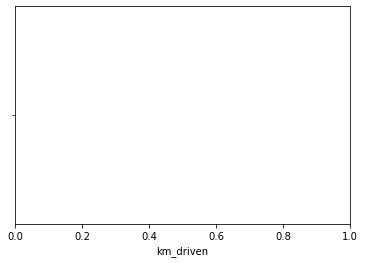

In [217]:
sns.boxplot(df_car['km_driven'])

In [219]:
q1 = df_car['km_driven'].quantile(0.25)
q3 = df_car['km_driven'].quantile(0.75)
iqr = q3 - q1

In [220]:
max_val_km_driven = q3 + 1.5*iqr

In [221]:
max_val_km_driven

nan

In [223]:
df_car.head()

,year,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats


In [224]:
df_car['km_driven'] = np.where(df_car['km_driven']>max_val_km_driven,max_val_km_driven,df_car['km_driven'])

<AxesSubplot:xlabel='year'>

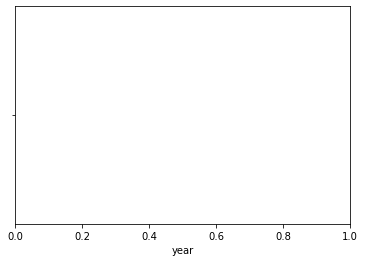

In [225]:
sns.boxplot(df_car['year'])

In [227]:
df_car = df_car[df_car['year'] >= 2000]

<AxesSubplot:xlabel='mileage'>

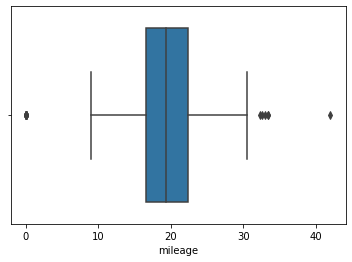

In [180]:
sns.boxplot(df_car['mileage'])

In [181]:
mean_mileage = df_car[df_car['mileage'] !=0]['mileage'].median()
mean_mileage

19.3

In [184]:
df_car['mileage'] = np.where(df_car['mileage'] == 0,mean_mileage,df_car['mileage'])

In [185]:
df_car.shape

(6239, 9)

In [186]:
df_car.head()

,year,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats
0,2014,145500,Diesel,Individual,Manual,23.40,1248,74.00,5
1,2014,120000,Diesel,Individual,Manual,21.14,1498,103.52,5
2,2006,140000,Petrol,Individual,Manual,17.70,1497,78.00,5
3,2010,127000,Diesel,Individual,Manual,23.00,1396,90.00,5
4,2007,120000,Petrol,Individual,Manual,16.10,1298,88.20,5


In [189]:
X = df_car.drop(columns=['seller_type'])
y = df_car['max_power']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [190]:
# Ordinal encoding on Owner col
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [198]:
tnf = ColumnTransformer(
    [
        ('ordinal',OrdinalEncoder(),['owner']),
        ('nominal',OneHotEncoder(drop='first',sparse=False),['fuel','seller_type','transmission','seats'])
    ], remainder='passthrough'
)

In [199]:
#X_train_tnf = tnf.fit_transform(X_train)
#X_test_tnf = tnf.transform(X_test)
from sklearn.linear_model import LinearRegression

In [200]:
lr = LinearRegression()

In [201]:
from sklearn.metrics import r2_score
#r2_score(y_test,y_pred)

In [202]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)

In [203]:
lr = LinearRegression()
#lr.fit(X_train_poly,y_train)
#y_pred = lr.predict(X_test_poly)
#r2_score(y_test,y_pred)

In [208]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))
X_train['fuel'].value_counts()

Diesel    2746
Petrol    2182
CNG         39
LPG         24
Name: fuel, dtype: int64

In [206]:
y_train

7469     71.00
5927     75.00
3294     68.00
7121     46.30
328      60.00
         ...  
1284    120.00
2948     63.00
4484     83.80
7334     81.86
3018     46.30
Name: max_power, Length: 4991, dtype: float64

In [207]:
x_train

,year,km_driven,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,...,torque_96 Nm at 3000 rpm,torque_96.1Nm@ 3000rpm,torque_96Nm@ 2500rpm,torque_96Nm@ 3500rpm,torque_98Nm@ 1600-3000rpm,torque_99.04Nm@ 4500rpm,torque_99.07Nm@ 4500rpm,torque_99.1Nm@ 4500rpm,torque_99.8Nm@ 2700rpm,torque_99Nm@ 4500rpm
3365,2012,90000,NaN,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6948,2014,60000,5.0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7977,2014,105000,5.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6708,2011,110000,7.0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4652,2014,120000,7.0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,2017,20000,5.0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1344,2013,81000,5.0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4623,2011,70000,5.0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7293,2015,57000,5.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
